In [1]:
import os, sys

# find repo root (looks for liars_poker/ or pyproject.toml)
def find_repo_root(start_dir: str) -> str:
    cur = os.path.abspath(start_dir)
    for _ in range(6):
        if os.path.isdir(os.path.join(cur, "liars_poker")) or os.path.exists(os.path.join(cur, "pyproject.toml")):
            return cur
        parent = os.path.dirname(cur)
        if parent == cur:
            break
        cur = parent
    return os.path.abspath(os.path.join(start_dir, "..", ".."))

NB_DIR = os.getcwd()
REPO_ROOT = find_repo_root(NB_DIR)
if REPO_ROOT not in sys.path:
    sys.path.insert(0, REPO_ROOT)

ARTIFACTS_ROOT = os.path.join(REPO_ROOT, "artifacts")
os.makedirs(ARTIFACTS_ROOT, exist_ok=True)

print("repo root   :", REPO_ROOT)
print("artifacts   :", ARTIFACTS_ROOT)


repo root   : c:\Users\adidh\Documents\liars_poker
artifacts   : c:\Users\adidh\Documents\liars_poker\artifacts


In [2]:
from liars_poker import (
    GameSpec, Env, InfoSet, Rules,
    Policy, TabularPolicy, CommitOnceMixture, RandomPolicy,
    eval_both_seats
)

from liars_poker.training.fsp import fsp_loop
from liars_poker.algo.br_exact_efficient import best_response_exact as best_response_efficient
from liars_poker.algo.br_exact import best_response_exact

In [16]:
spec = GameSpec(ranks=7, suits=2, hand_size=1, claim_kinds=("RankHigh", "Pair"), suit_symmetry=True)
rules = Rules(spec)

In [18]:
answer, debug = fsp_loop(spec, best_response_exact, 10, episodes_test=1)

Predicted exploitability: avg=0.9572 (first=0.9615, second=0.9529)
Sampled exploitability: avg=1.0000, chi2 p-value=0.8326

Predicted exploitability: avg=0.8692 (first=0.8888, second=0.8497)
Sampled exploitability: avg=1.0000, chi2 p-value=0.6981

Predicted exploitability: avg=0.8283 (first=0.8746, second=0.7819)
Sampled exploitability: avg=1.0000, chi2 p-value=0.6488

Predicted exploitability: avg=0.7743 (first=0.8001, second=0.7485)
Sampled exploitability: avg=1.0000, chi2 p-value=0.5893

Predicted exploitability: avg=0.7715 (first=0.7895, second=0.7536)
Sampled exploitability: avg=0.0000, chi2 p-value=0.0661

Predicted exploitability: avg=0.7762 (first=0.7944, second=0.7580)
Sampled exploitability: avg=0.0000, chi2 p-value=0.06255

Predicted exploitability: avg=0.7728 (first=0.8049, second=0.7407)
Sampled exploitability: avg=1.0000, chi2 p-value=0.5877

Predicted exploitability: avg=0.7721 (first=0.7889, second=0.7553)
Sampled exploitability: avg=1.0000, chi2 p-value=0.5869

Predict

In [ ]:
# answer1, info1 = fsp_loop(spec, best_response_efficient, 300, episodes_test=1)

Predicted exploitability: avg=0.8841 (first=0.9063, second=0.8619)
Sampled exploitability: avg=0.0000, chi2 p-value=0.005753

Predicted exploitability: avg=0.8022 (first=0.8183, second=0.7861)
Sampled exploitability: avg=0.0000, chi2 p-value=0.04401

Predicted exploitability: avg=0.7358 (first=0.8167, second=0.6549)
Sampled exploitability: avg=1.0000, chi2 p-value=0.549

Predicted exploitability: avg=0.6935 (first=0.7792, second=0.6079)
Sampled exploitability: avg=0.0000, chi2 p-value=0.1325

Predicted exploitability: avg=0.6548 (first=0.7300, second=0.5796)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4678

Predicted exploitability: avg=0.6405 (first=0.7203, second=0.5608)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4538

Predicted exploitability: avg=0.6385 (first=0.7221, second=0.5548)
Sampled exploitability: avg=0.0000, chi2 p-value=0.1839

Predicted exploitability: avg=0.6298 (first=0.6913, second=0.5683)
Sampled exploitability: avg=1.0000, chi2 p-value=0.4432

Predic

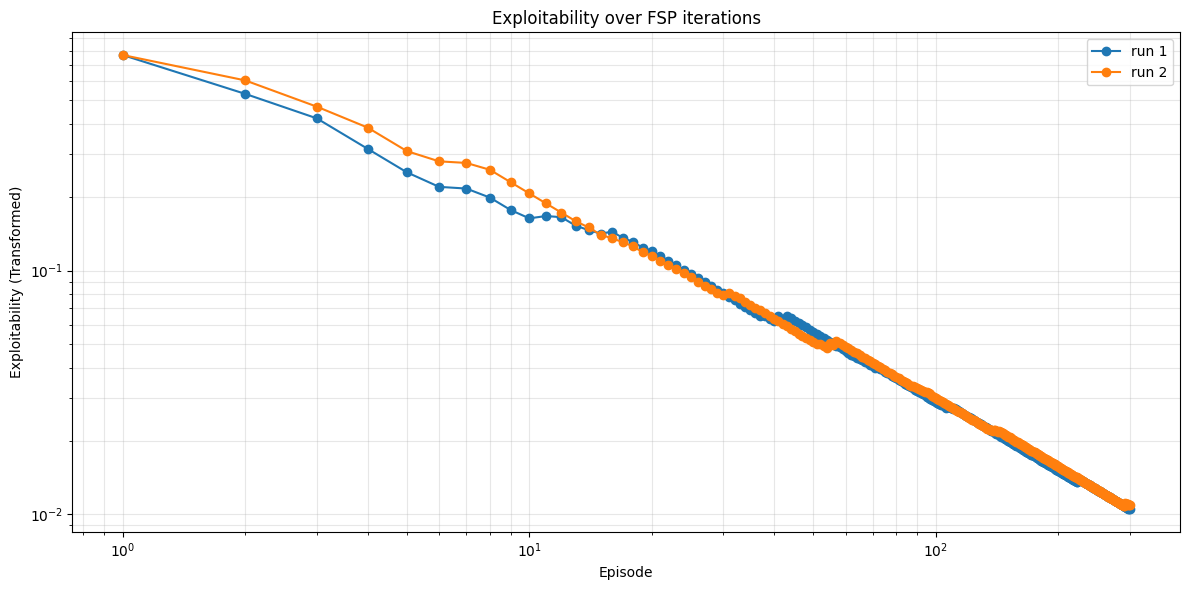

In [10]:
from liars_poker.training.fsp import plot_exploitability_series
ax = plot_exploitability_series([debug, info1], average=True, figsize=(12, 6), transform=True)
# or plot_exploitability_series(info, average=False)


In [19]:
from liars_poker.serialization import save_policy
save_dir = "C:/Users/adidh/Documents/liars_poker/artifacts/my_test_policy_4"

# 3. Save
# This will create 'policy.npz' (heavy data) and 'spec.json' (metadata) inside the folder
save_policy(answer, save_dir)